In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import RidgeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_excel('Paitients_Files_Train.xlsx',
                        index_col = 'ID')
train_data

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
ID,,,,,,,,,,
ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative


## Train data Inspection

## Univariate Analysis

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599 entries, ICU200010 to ICU200608
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
 9   Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 51.5+ KB


In [4]:
train_data.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.825,3.363,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.154,32.682,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.733,19.336,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.563,16.018,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.461,116.576,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920,8.008,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481,0.338,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290,11.828,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686,0.464,0.000,0.000,1.000,1.000,1.00


In [5]:
train_data.isna().sum()

PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [6]:
skewness = train_data.skew(numeric_only=True)
print(skewness)

PRG          0.914008
PL           0.116180
PR          -1.874662
SK           0.164063
TS           2.401585
M11         -0.405255
BD2          1.989472
Age          1.152353
Insurance   -0.804257
dtype: float64


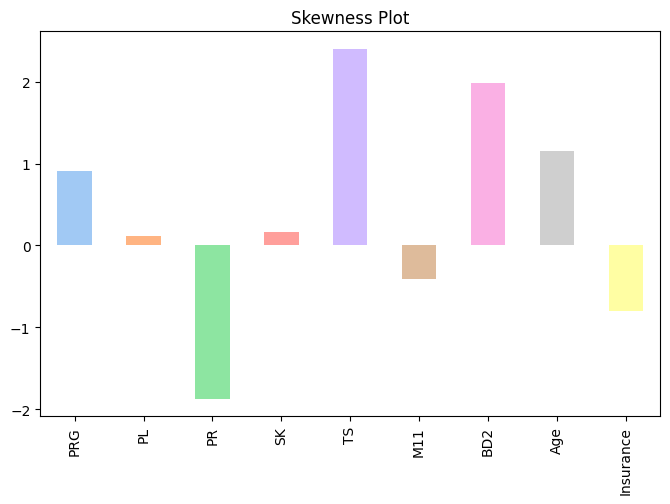

In [7]:
import matplotlib.cm as cm
colors = sns.color_palette('pastel')

fig, ax = plt.subplots(figsize=(8, 5))
#colors = cm.summer(skewness)
skewness.plot(kind='bar', ax=ax, color= colors)
ax.set_title('Skewness Plot')

# Removing gridlines
plt.grid(False)
plt.show()

In [8]:
kurtosis = train_data.kurt(numeric_only=True)
print(kurtosis)

PRG          0.289909
PL           0.756402
PR           5.258883
SK          -0.314253
TS           8.088956
M11          3.261027
BD2          6.114674
Age          0.692271
Insurance   -1.357716
dtype: float64


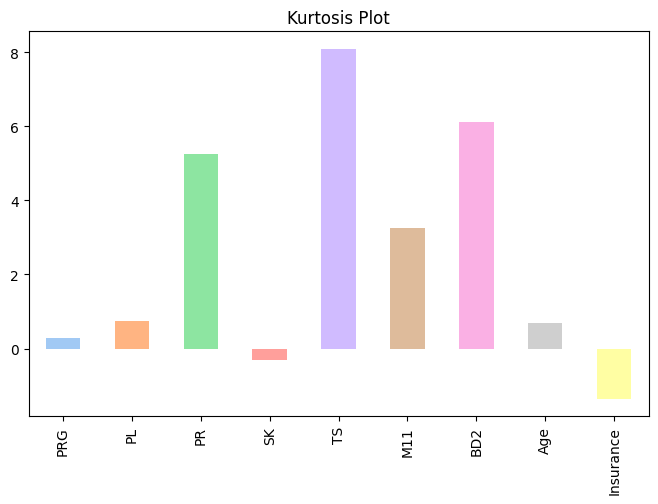

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))
#colors = cm.winter(kurtosis)
kurtosis.plot(kind='bar', ax=ax, color= colors)
ax.set_title('Kurtosis Plot')

# Removing gridlines
plt.grid(False)
plt.show()

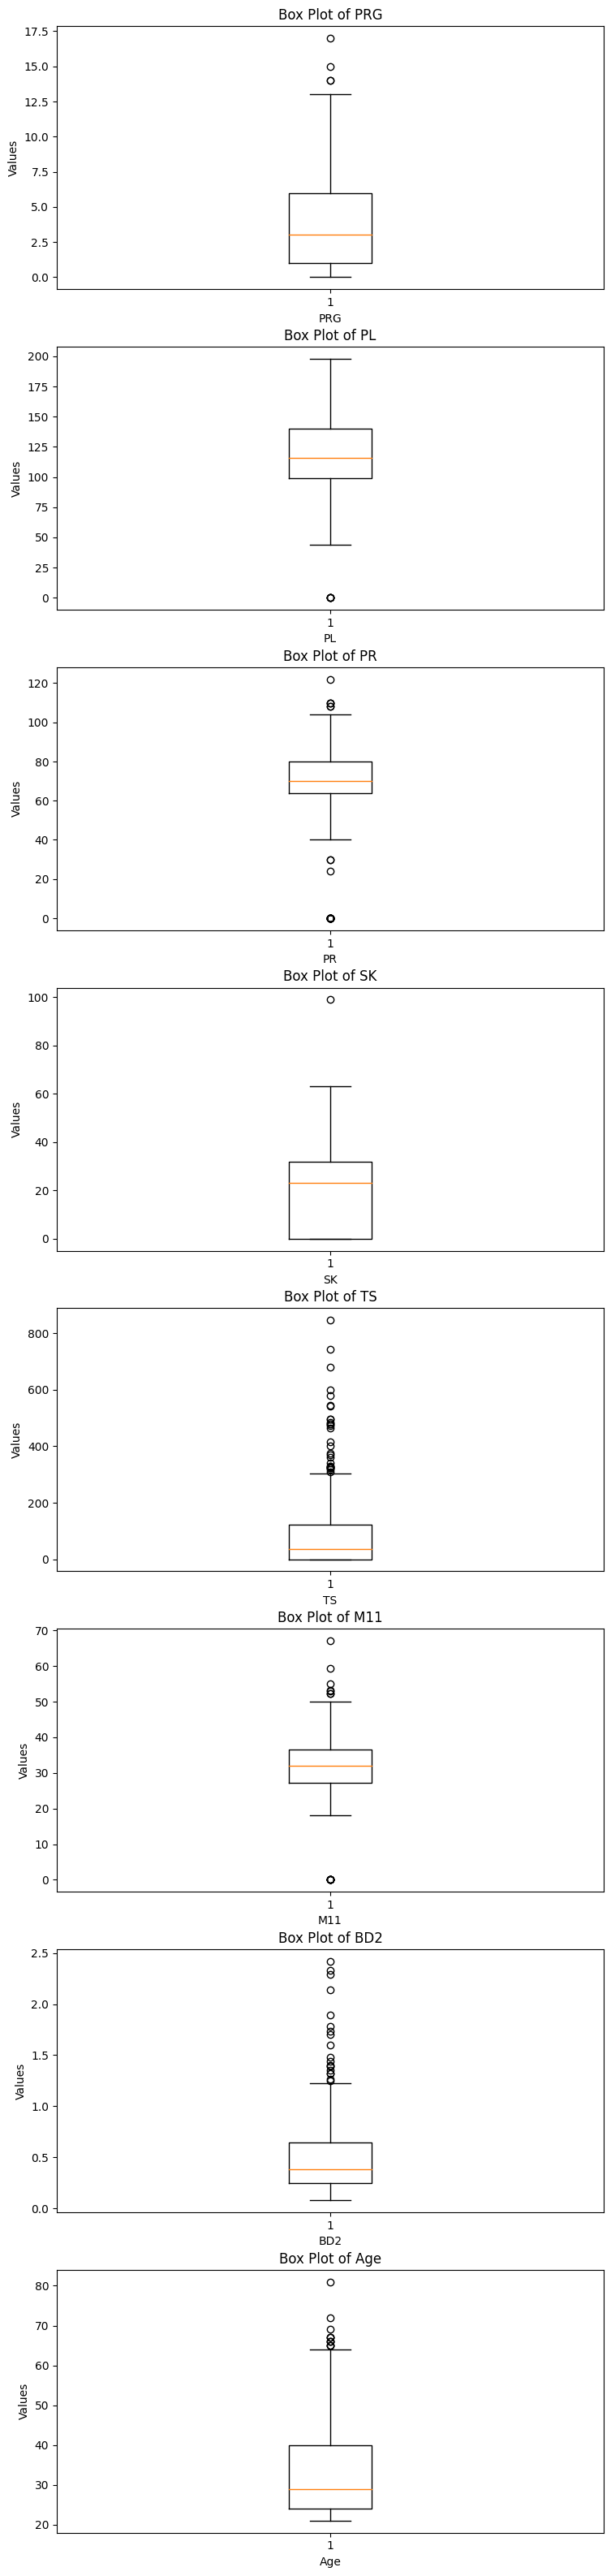

In [10]:
columns = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

# Set the figure size and layout
fig, axes = plt.subplots(nrows=len(columns), figsize=(8, len(columns) * 4))
fig.tight_layout(pad=3.0)

for i, column in enumerate(columns):
    ax = axes[i]
    ax.boxplot(train_data[column]) 
    ax.set_xlabel(column)  
    ax.set_ylabel('Values') 
    ax.set_title(f'Box Plot of {column}') 


plt.show()

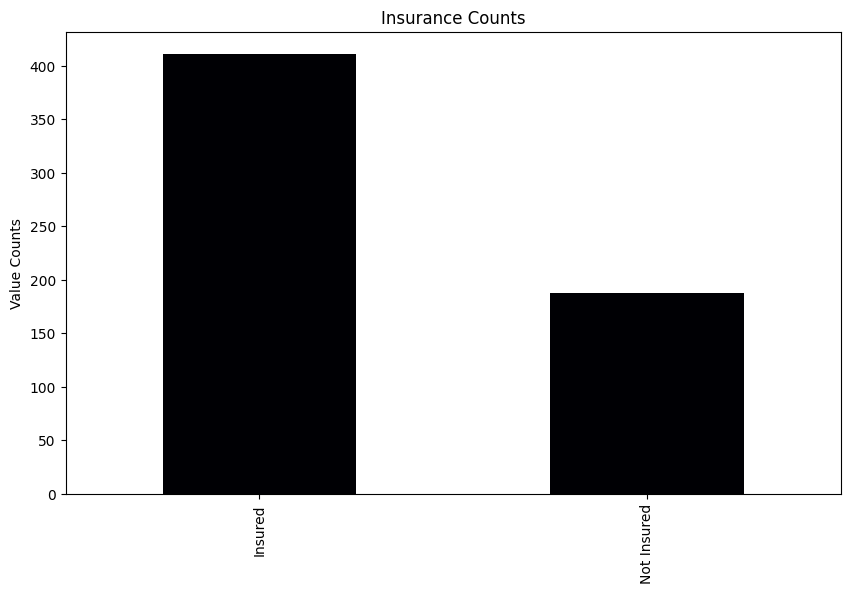

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
train_data['Insurance'].value_counts().plot(kind='bar', ax=ax, color=cm.magma(train_data.Insurance))
ax.set_title('Insurance Counts')
ax.set_xticklabels({'Insured': 1, 'Not Insured': 0})
ax.set_ylabel('Value Counts')

# Removing gridlines
plt.grid(False)
plt.show()

## Multivariate Analysis

In [12]:
corr = train_data.corr(numeric_only=True).round(3)
corr

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
PRG,1.000,0.140,0.117,-0.081,-0.055,0.033,-0.052,0.533,0.085
PL,0.140,1.000,0.143,0.054,0.340,0.216,0.145,0.274,0.051
PR,0.117,0.143,1.000,0.198,0.095,0.269,0.008,0.226,-0.025
SK,-0.081,0.054,0.198,1.000,0.429,0.378,0.177,-0.122,-0.017
TS,-0.055,0.340,0.095,0.429,1.000,0.185,0.218,-0.012,0.042
M11,0.033,0.216,0.269,0.378,0.185,1.000,0.128,0.046,0.027
BD2,-0.052,0.145,0.008,0.177,0.218,0.128,1.000,0.034,0.006
Age,0.533,0.274,0.226,-0.122,-0.012,0.046,0.034,1.000,0.054
Insurance,0.085,0.051,-0.025,-0.017,0.042,0.027,0.006,0.054,1.000


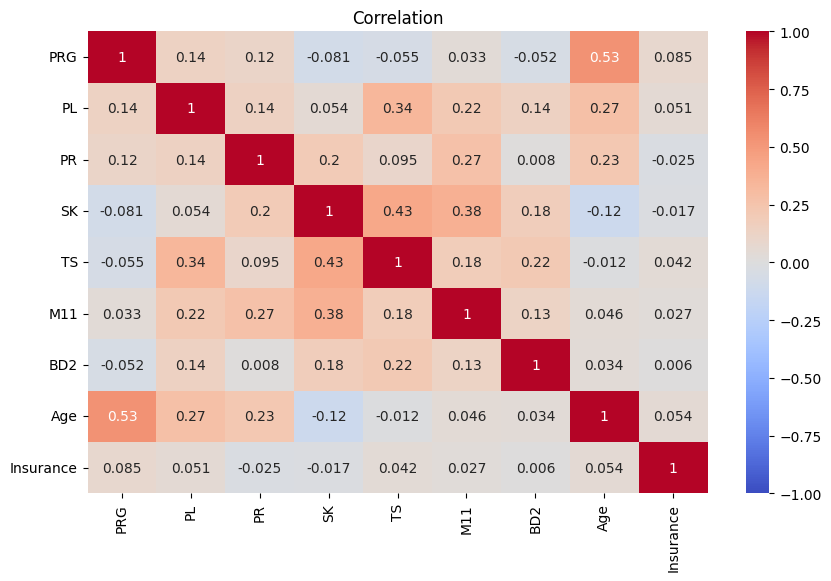

In [13]:
fig, ax = plt.subplots(figsize = (10, 6))

# create a heatmap using seaborn
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax =ax)

# set rotation for x-axis and y-axis tick labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

# set plot title
plt.title('Correlation')

# show the plot
plt.show()

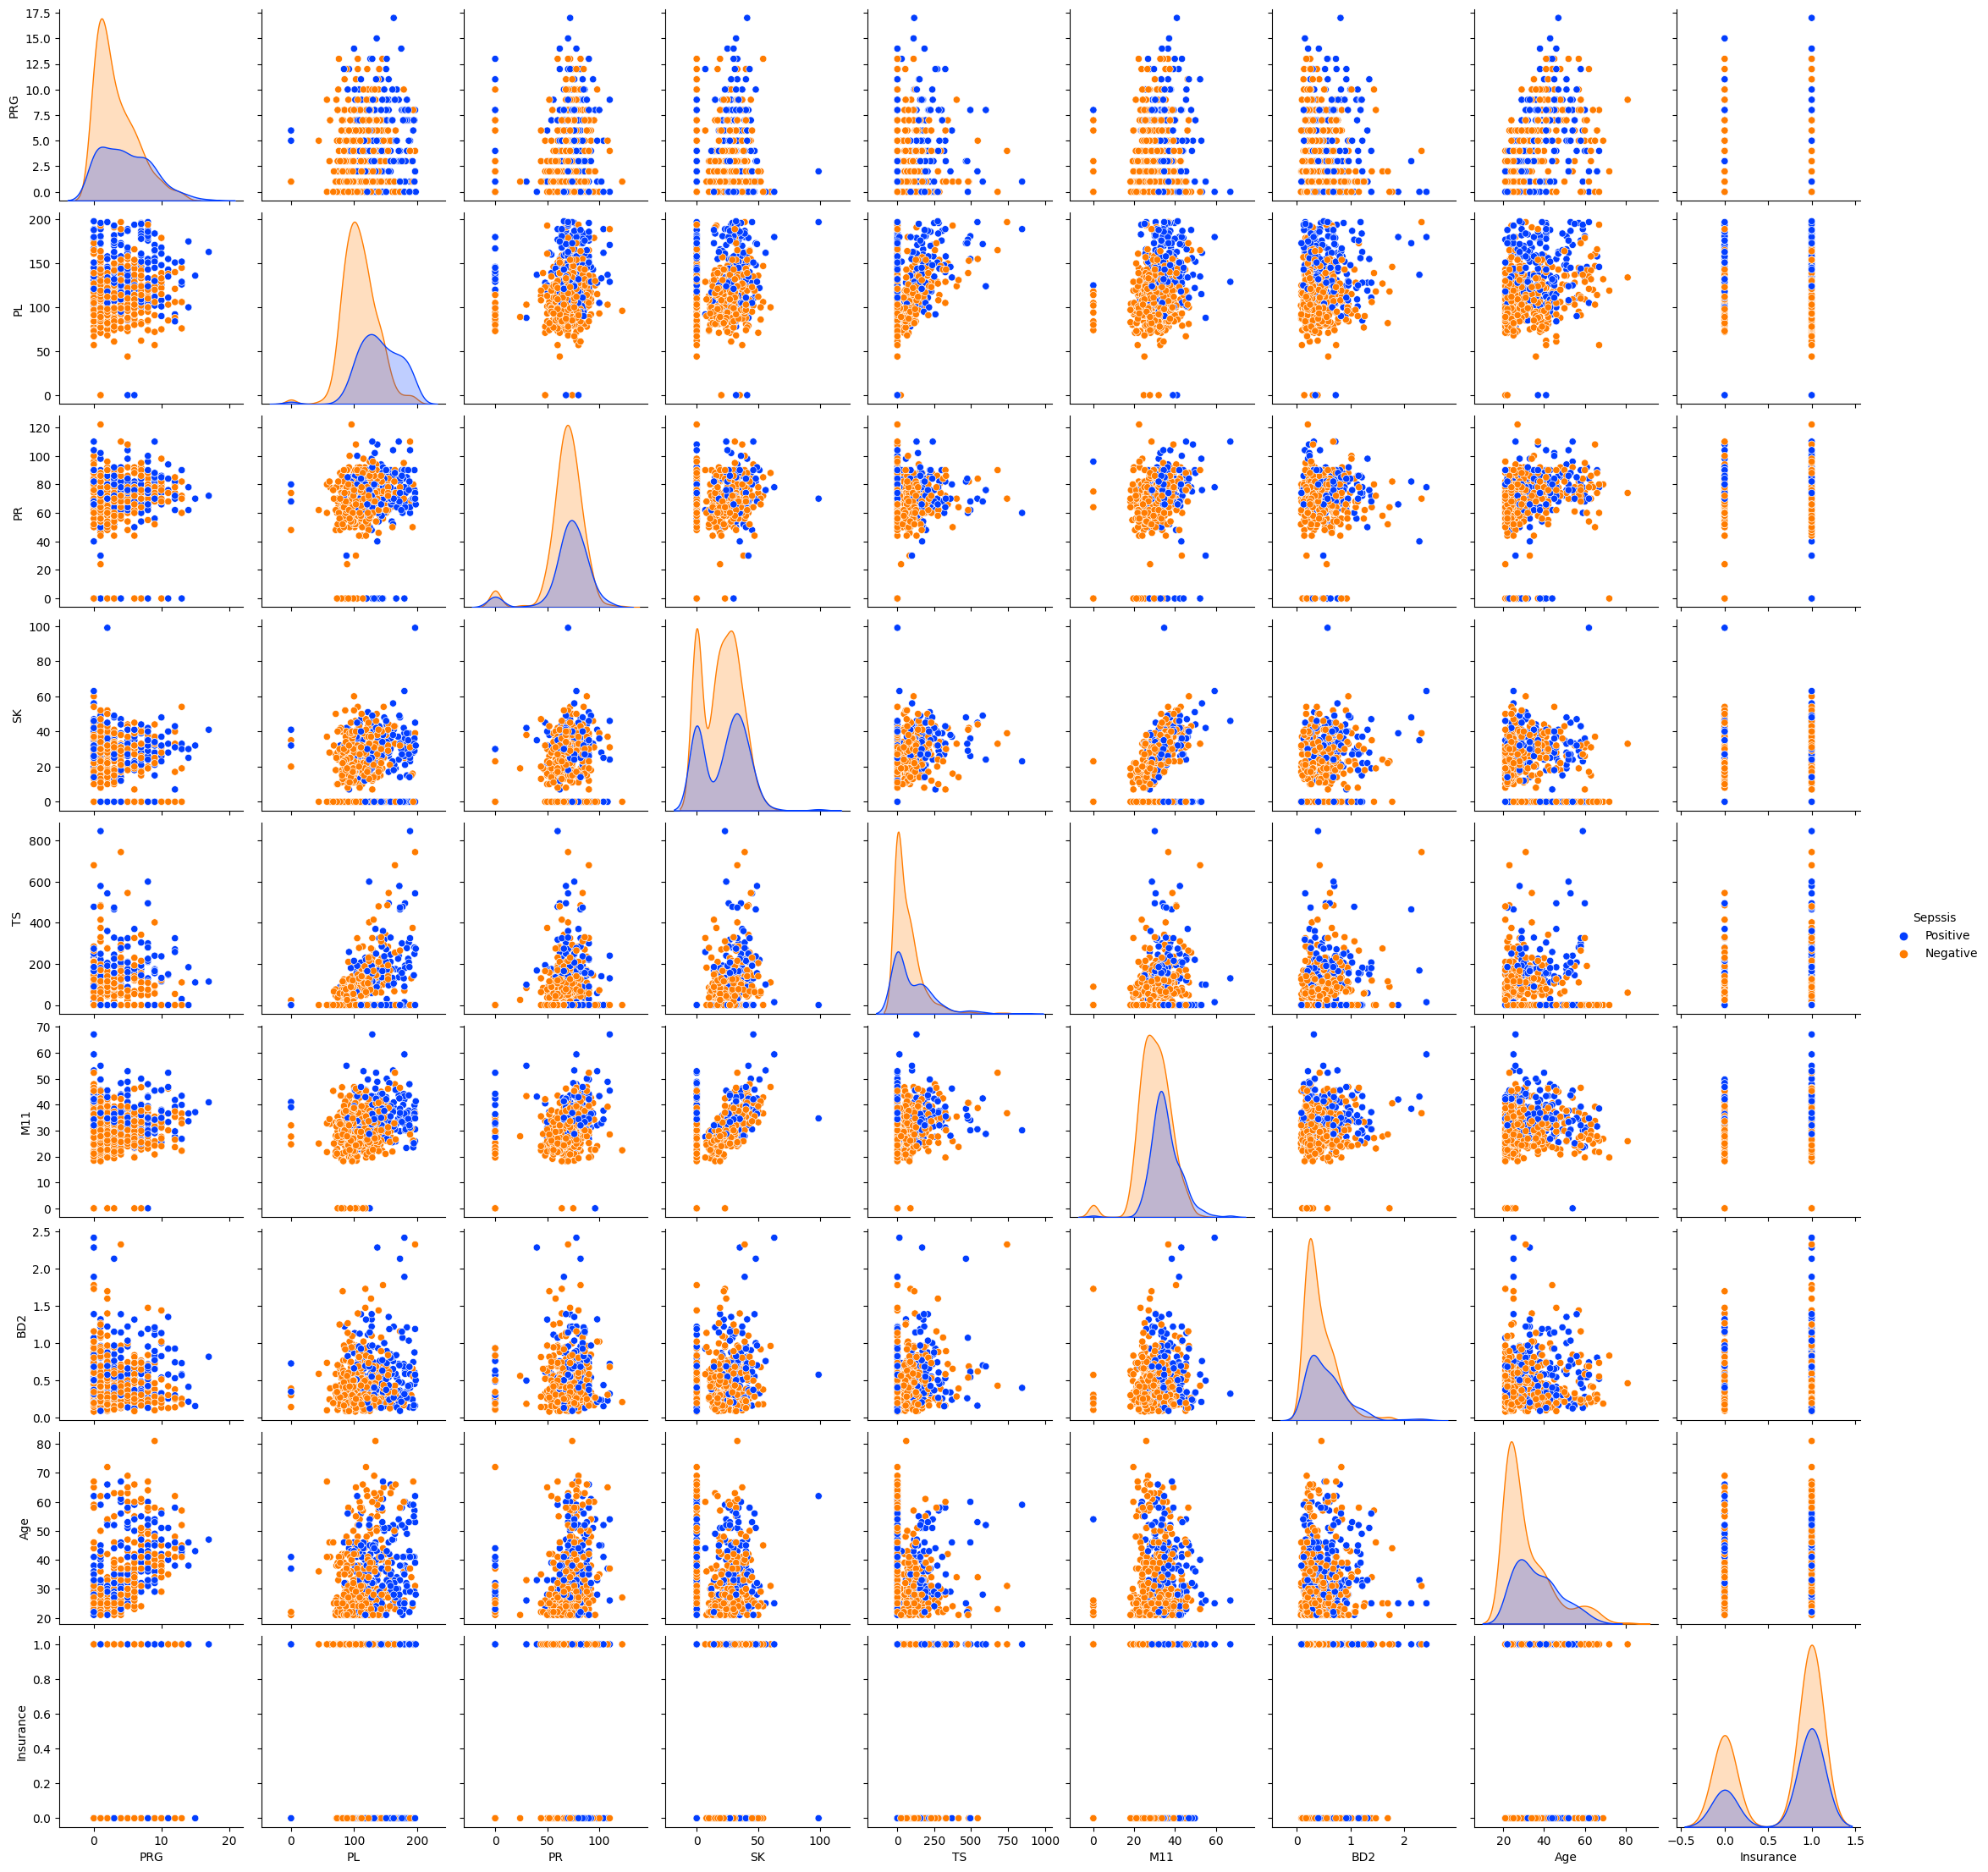

In [14]:
sns.pairplot(train_data, hue='Sepssis', palette='bright')

# Removing gridlines
plt.grid(False)
plt.show()

In [15]:
cross_tab = pd.crosstab(train_data['Insurance'], train_data['Sepssis'])
print(cross_tab)

Sepssis    Negative  Positive
Insurance                    
0               131        57
1               260       151


- Negative Sepssis:

For the category 'Negative' in 'Sepssis', there are 131 occurrences in the '0' category of 'Insurance' and 260 occurrences in the '1' category of 'Insurance'.


- Positive Sepssis:

For the category 'Positive' in 'Sepssis', there are 57 occurrences in the '0' category of 'Insurance' and 151 occurrences in the '1' category of 'Insurance'.

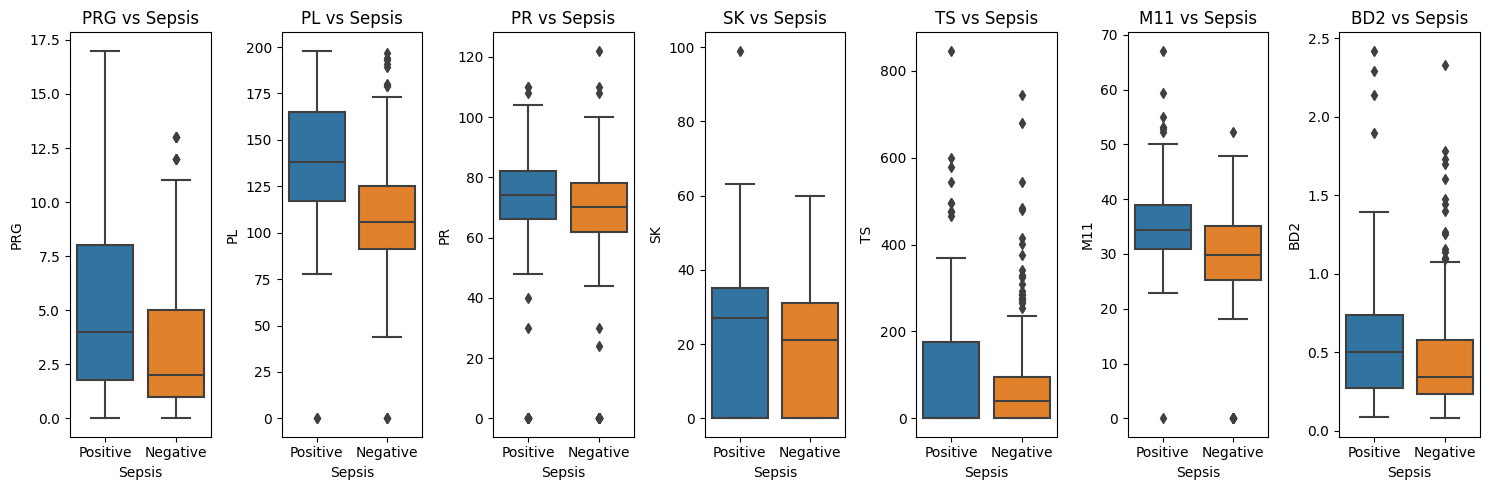

In [16]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 5))

# Iterate through each numerical variable
numerical_vars = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2']
for i, var in enumerate(numerical_vars):
    # Create a box plot for each numerical variable
    sns.boxplot(x='Sepssis', y=var, data=train_data, ax=axes[i])
    axes[i].set_title(f'{var} vs Sepsis')
    axes[i].set_xlabel('Sepsis')
    axes[i].set_ylabel(var)

# Adjust the spacing between subplots
plt.tight_layout()

In [17]:
age_sep = train_data.groupby('Age')['Sepssis'].value_counts()
age_sep

Age  Sepssis 
21   Negative    47
     Positive     5
22   Negative    46
     Positive     6
23   Negative    21
                 ..
67   Negative     2
     Positive     1
69   Negative     1
72   Negative     1
81   Negative     1
Name: Sepssis, Length: 91, dtype: int64

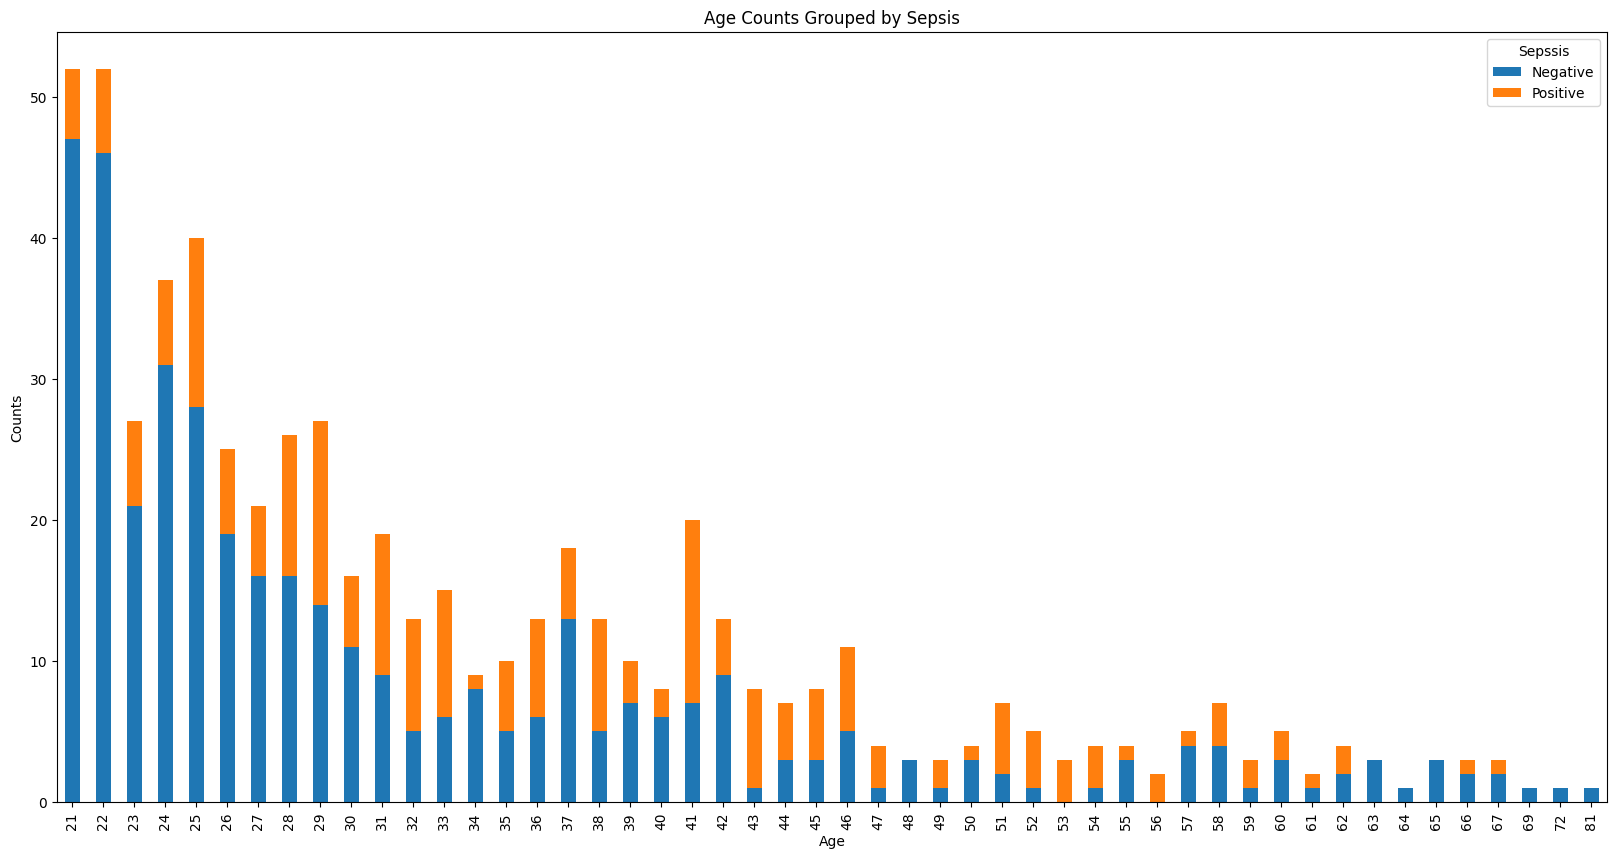

In [18]:
# Reshaping the data for plotting
age_sep = age_sep.unstack()

# Plotting the grouped data
age_sep.plot(kind='bar', stacked=True, figsize=(20, 10))

# Setting labels and title
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age Counts Grouped by Sepsis')

# Removing gridlines
plt.grid(False)

# Displaying the plot
plt.show()

In [19]:
age_ins = train_data.groupby('Age')['Insurance'].value_counts()
age_ins

Age  Insurance
21   1            35
     0            17
22   1            33
     0            19
23   1            15
                  ..
66   0             1
67   1             3
69   0             1
72   1             1
81   1             1
Name: Insurance, Length: 91, dtype: int64

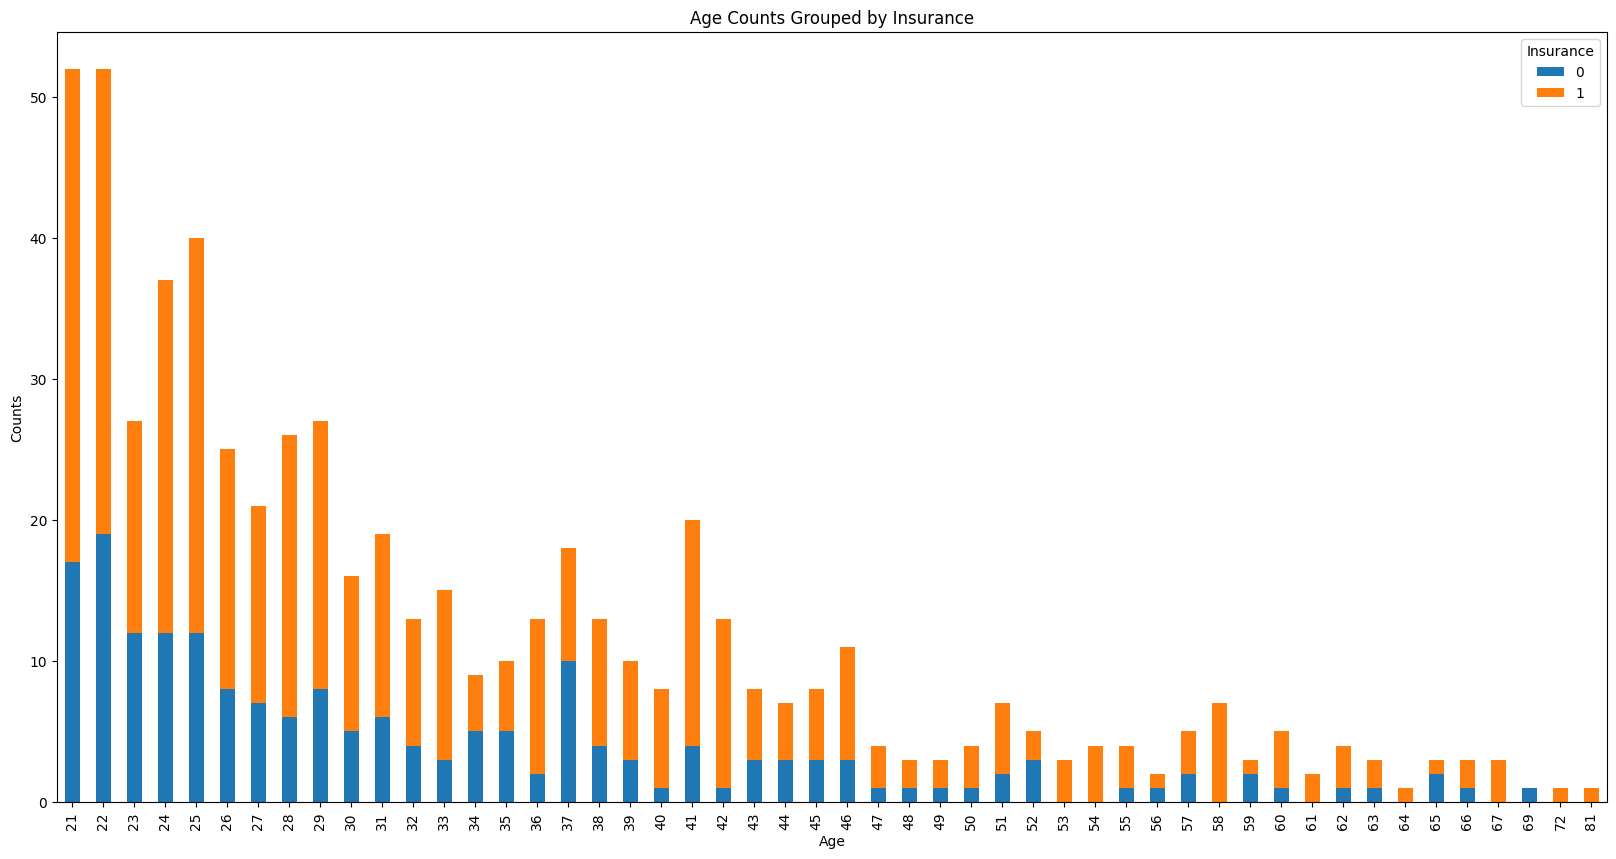

In [20]:
# Reshaping the data for plotting
age_ins = age_ins.unstack()

# Plotting the grouped data
age_ins.plot(kind='bar', stacked=True, figsize=(20, 10))

# Setting labels and title
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age Counts Grouped by Insurance')

# Removing gridlines
plt.grid(False)

# Displaying the plot
plt.show()

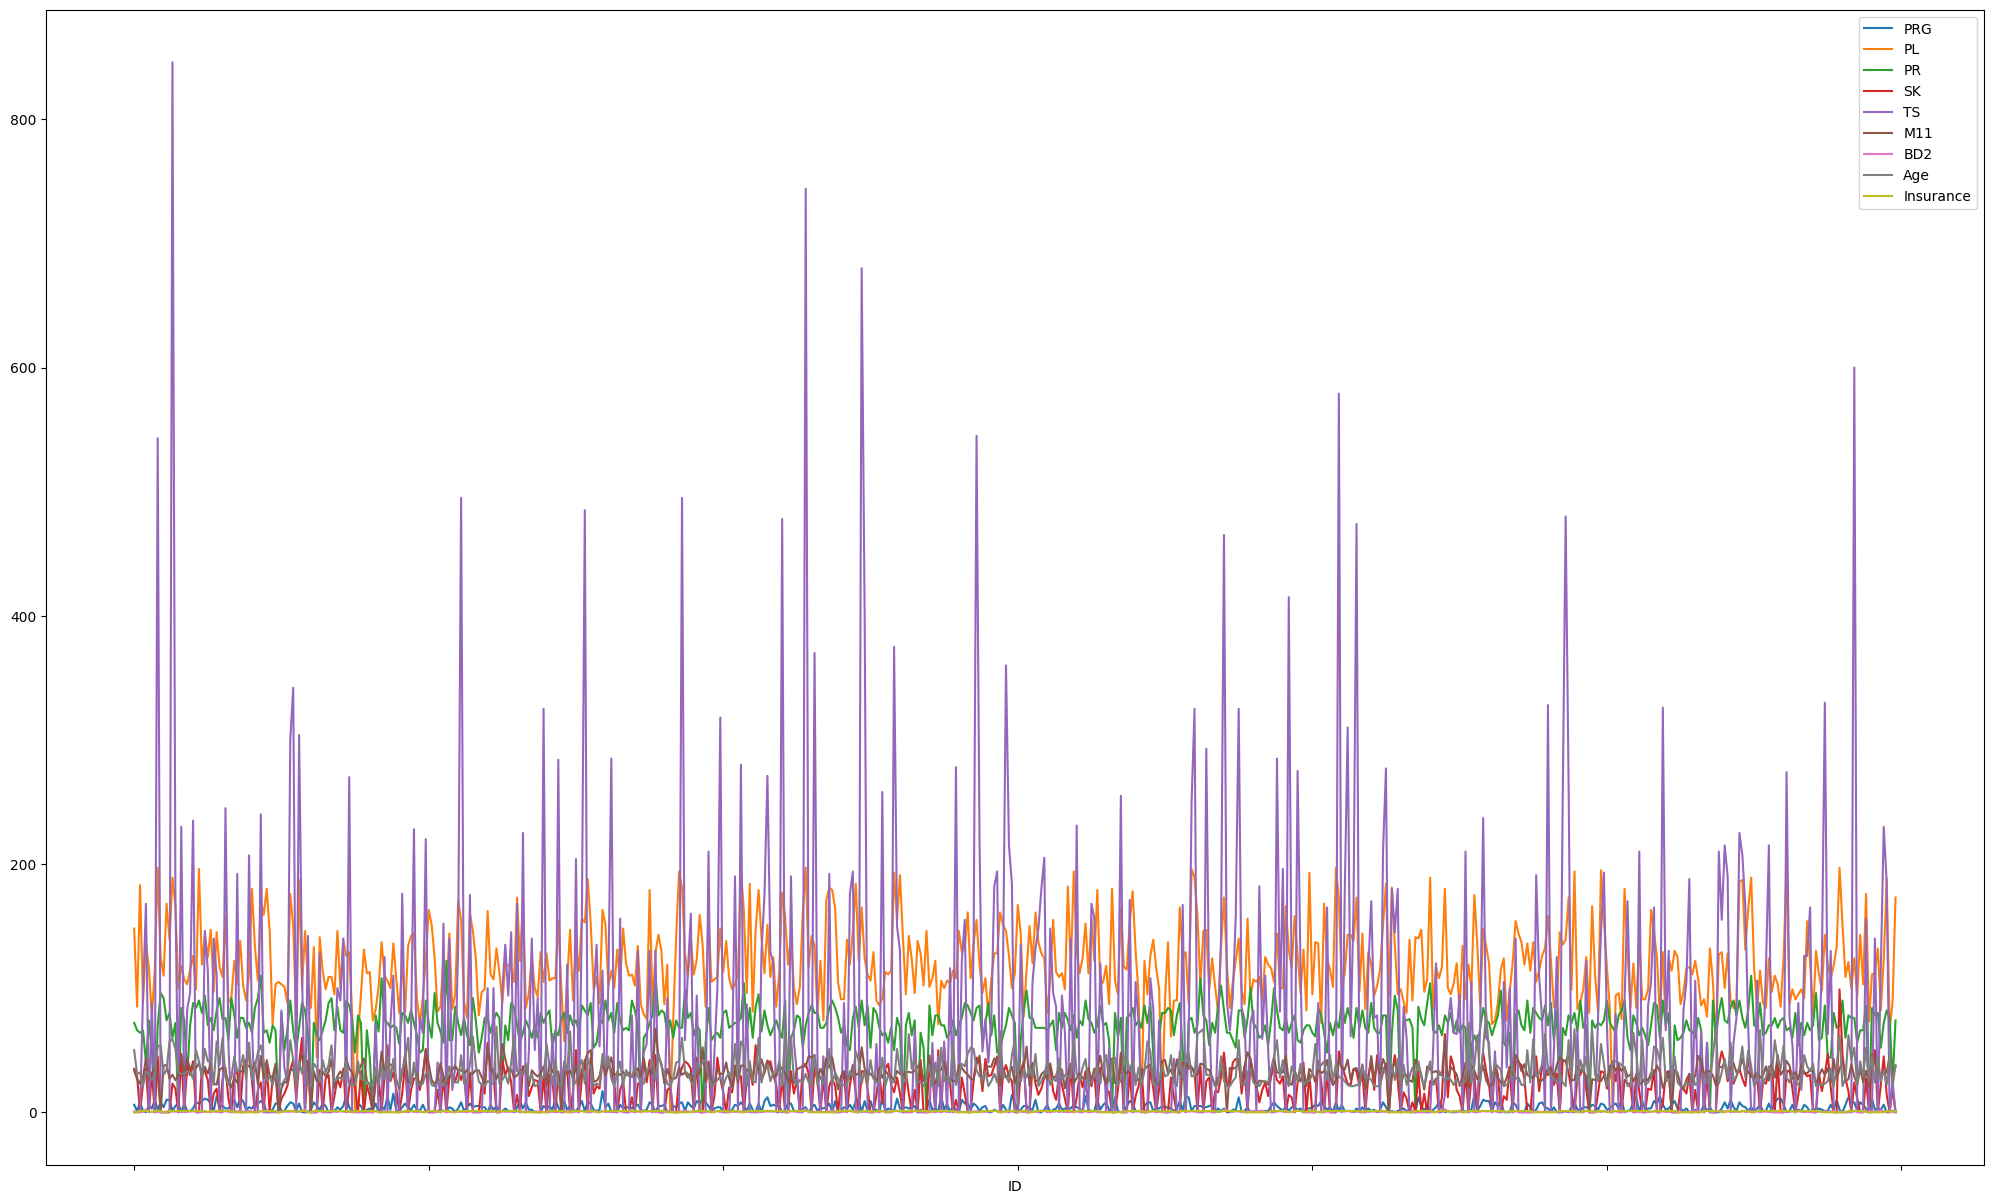

In [21]:
fig, ax = plt.subplots(figsize = (25, 15))
train_data.plot(ax = ax)
ax.set_xticklabels('')
#ax.set_title('')

# Removing gridlines
plt.grid(False)

plt.show()

In [22]:
plot_data = train_data.copy()

cat_cols = ['Sepssis']

for col in cat_cols:
    encoder = LabelEncoder()
    encoder.fit(plot_data[col])
    plot_data[col] = encoder.transform(plot_data[col])


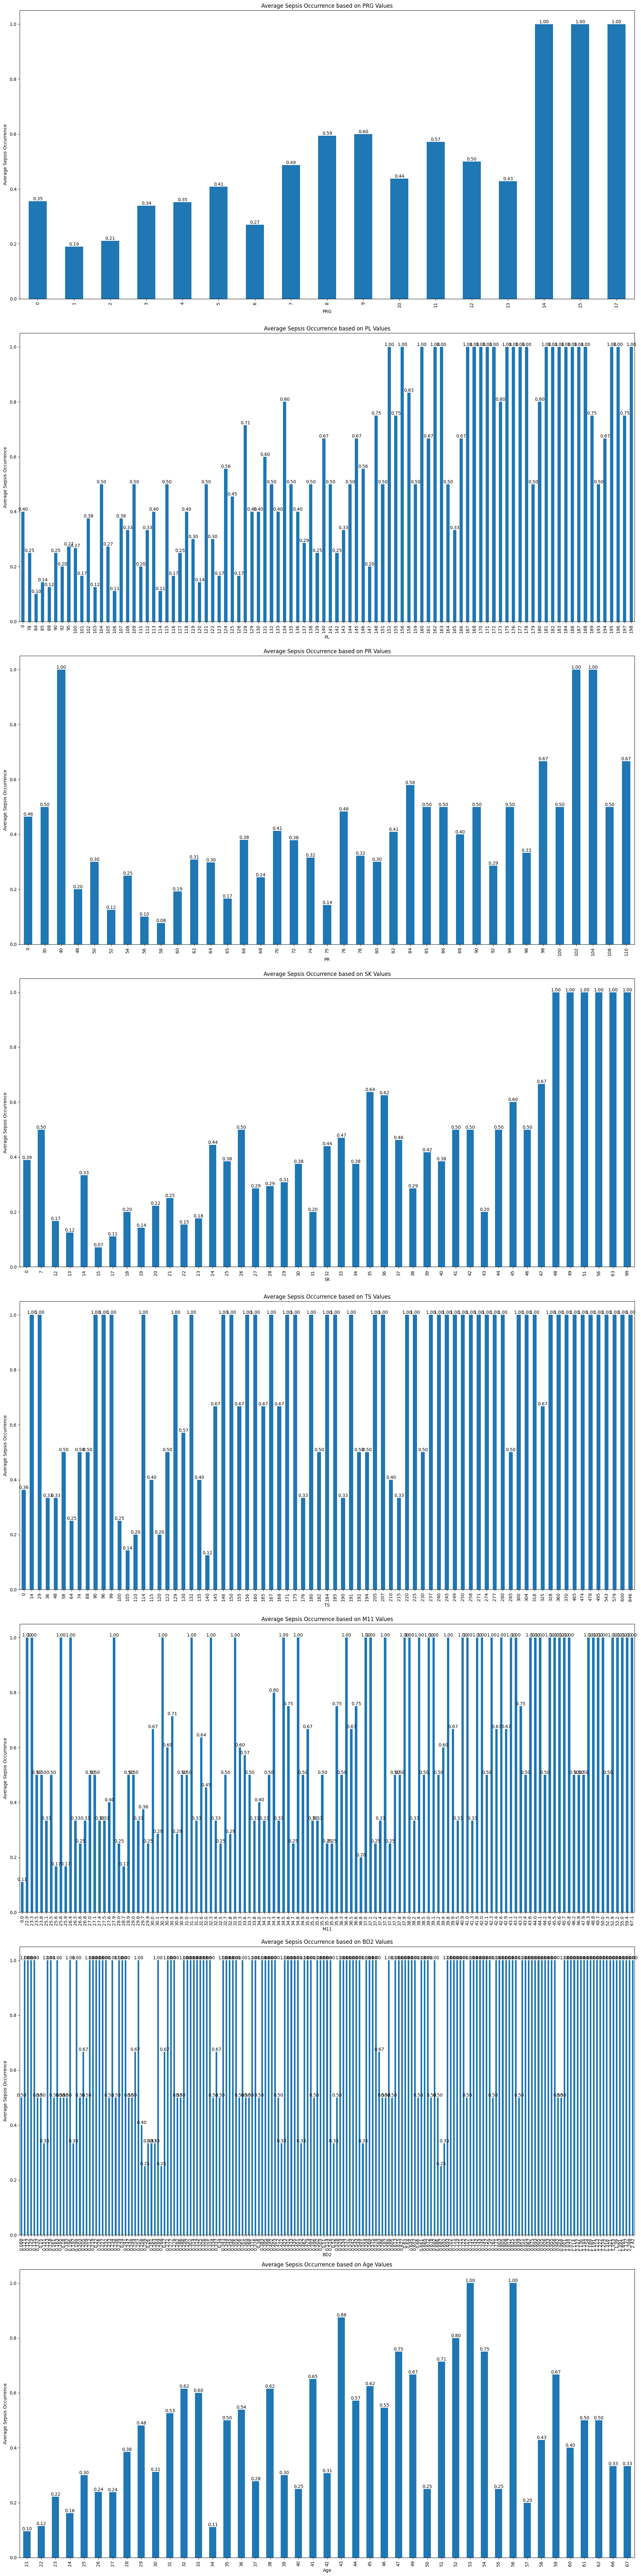

In [23]:
# List of columns to analyze
columns = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

# Create subplots for each column
fig, ax = plt.subplots(len(columns), 1, figsize=(20, len(columns)*10), sharey=True)

for i, column in enumerate(columns):
    # Group the data by column values and calculate the average sepsis occurrence
    column_sepsis_avg = plot_data.groupby(column)['Sepssis'].mean()
    
    # Filter out values with average sepsis occurrence of 0
    column_sepsis_avg_filtered = column_sepsis_avg[column_sepsis_avg > 0]
    
    if len(column_sepsis_avg_filtered) > 0:
        # Plot the average sepsis occurrence based on column values
        column_sepsis_avg_filtered.plot(kind='bar', ax=ax[i])
        
        ax[i].set_xlabel(column)
        ax[i].set_ylabel('Average Sepsis Occurrence')
        ax[i].set_title(f'Average Sepsis Occurrence based on {column} Values')
        ax[i].grid(False)
        
        # Add labels to the bars
        for j, v in enumerate(column_sepsis_avg_filtered):
            ax[i].text(j, v, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [24]:
# Splitting the data into features (X) and target variable (y)
X = train_data.drop(['Sepssis', 'Insurance'], axis=1)  # Drop the target variable column
y = train_data['Sepssis']

# Train a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X, y)

# Get feature importance
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                    index=X.columns,
                                    columns=['Importance'])
feature_importances = feature_importances.sort_values('Importance',
                                                    ascending=False)

# Print top features
print(feature_importances.head(10))

     Importance
PL     0.253448
M11    0.177728
Age    0.126310
BD2    0.125615
PR     0.092857
TS     0.079638
PRG    0.076003
SK     0.068402


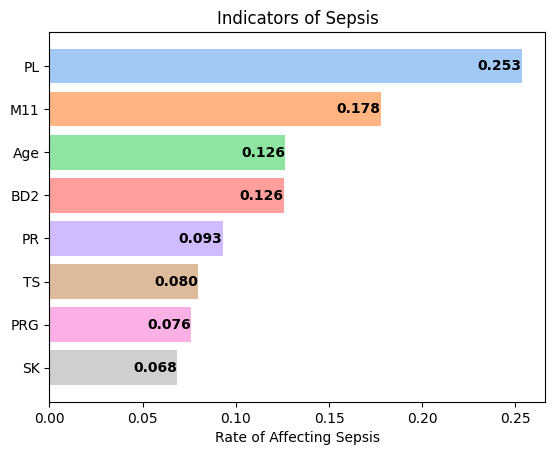

In [25]:
# Define a color palette
palette = sns.color_palette('pastel')

# Create a bar chart of the top 10 features and their importances
fig, ax = plt.subplots()
ax.barh(feature_importances.index, feature_importances['Importance'][:10], color=palette)
ax.invert_yaxis()
ax.set_xlabel('Rate of Affecting Sepsis')
ax.set_title('Indicators of Sepsis')

# Add labels to the bars
for i, v in enumerate(feature_importances['Importance'][:10]):
    ax.text(v, i, f'{v:.3f}', color='black', fontweight='bold', ha='right', va='center')

# Removing gridlines
plt.grid(False)

# Show the chart
plt.show()

## Checking for class imbalance

In [26]:
counts = train_data['Sepssis'].value_counts()

# Calculate the percentage of each class in the 'Sepssis' column
percentages = counts / counts.sum() * 100

# Print the results
print(percentages)

Negative    65.275459
Positive    34.724541
Name: Sepssis, dtype: float64


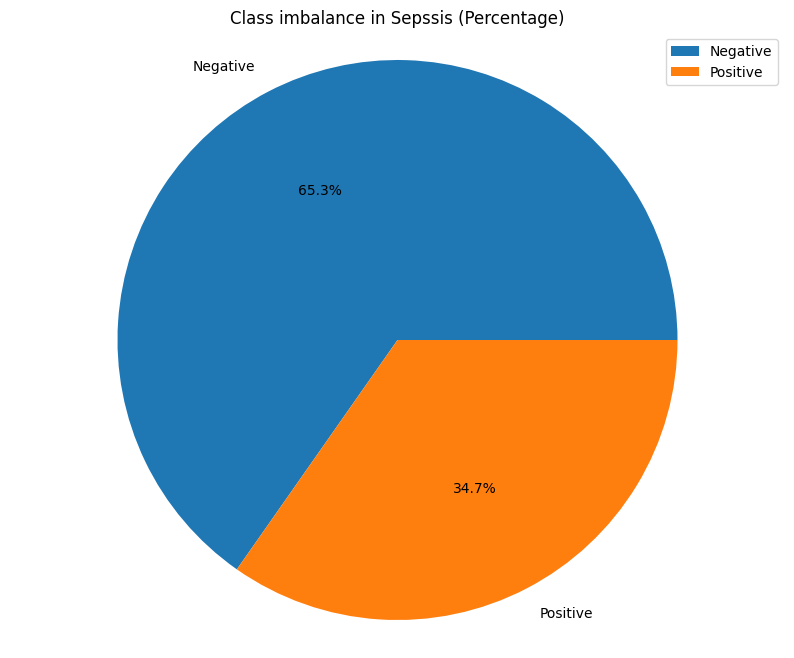

In [27]:
# Define the data for the chart
labels = percentages.index.tolist()
sizes = percentages.values.tolist()

# Create the chart
fig, ax = plt.subplots(figsize = (10, 8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Class imbalance in Sepssis (Percentage)')
plt.legend()

# Show the chart
plt.show()

## Test Data Inspection

In [28]:
test_data = pd.read_excel('Paitients_Files_Test.xlsx', index_col= 'ID')
test_data

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
ID,,,,,,,,,
ICU200609,1,109,38,18,120,23.1,0.407,26,1
ICU200610,1,108,88,19,0,27.1,0.400,24,1
ICU200611,6,96,0,0,0,23.7,0.190,28,1
ICU200612,1,124,74,36,0,27.8,0.100,30,1
ICU200613,7,150,78,29,126,35.2,0.692,54,0
...,...,...,...,...,...,...,...,...,...
ICU200773,10,101,76,48,180,32.9,0.171,63,1
ICU200774,2,122,70,27,0,36.8,0.340,27,1
ICU200775,5,121,72,23,112,26.2,0.245,30,1


In [29]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, ICU200609 to ICU200777
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        169 non-null    int64  
 1   PL         169 non-null    int64  
 2   PR         169 non-null    int64  
 3   SK         169 non-null    int64  
 4   TS         169 non-null    int64  
 5   M11        169 non-null    float64
 6   BD2        169 non-null    float64
 7   Age        169 non-null    int64  
 8   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 13.2+ KB


In [30]:
test_data.isna().sum()

PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [31]:
test_data.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,3.917160,123.520710,70.426036,20.443787,81.000000,32.249704,0.438876,33.065089,0.727811
std,3.402415,29.259123,19.426805,15.764962,110.720852,7.444886,0.306935,11.548110,0.446410
min,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,102.000000,62.000000,0.000000,0.000000,27.600000,0.223000,24.000000,0.000000
50%,3.000000,120.000000,74.000000,23.000000,0.000000,32.400000,0.343000,28.000000,1.000000
75%,6.000000,141.000000,80.000000,32.000000,135.000000,36.600000,0.587000,42.000000,1.000000
max,13.000000,199.000000,114.000000,49.000000,540.000000,57.300000,1.698000,70.000000,1.000000


In [32]:
corr = test_data.corr()
corr

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
PRG,1.000000,0.088808,0.226032,-0.084315,-0.143327,-0.042980,0.041405,0.587779,0.000742
PL,0.088808,1.000000,0.184448,0.070199,0.296815,0.240396,0.119497,0.224456,-0.040125
PR,0.226032,0.184448,1.000000,0.243956,0.064700,0.327511,0.179641,0.292158,-0.134804
SK,-0.084315,0.070199,0.243956,1.000000,0.466503,0.450529,0.214038,-0.086018,-0.023332
TS,-0.143327,0.296815,0.064700,0.466503,1.000000,0.250437,0.051053,-0.159589,-0.114407
M11,-0.042980,0.240396,0.327511,0.450529,0.250437,1.000000,0.201224,-0.001741,-0.001815
BD2,0.041405,0.119497,0.179641,0.214038,0.051053,0.201224,1.000000,0.031738,0.094673
Age,0.587779,0.224456,0.292158,-0.086018,-0.159589,-0.001741,0.031738,1.000000,-0.013863
Insurance,0.000742,-0.040125,-0.134804,-0.023332,-0.114407,-0.001815,0.094673,-0.013863,1.000000


In [33]:
cat_cols = ['Sepssis']

for col in cat_cols:
    encoder = LabelEncoder()
    encoder.fit(train_data[col])
    train_data[col] = encoder.transform(train_data[col])

In [34]:
train_data

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
ID,,,,,,,,,,
ICU200010,6,148,72,35,0,33.6,0.627,50,0,1
ICU200011,1,85,66,29,0,26.6,0.351,31,0,0
ICU200012,8,183,64,0,0,23.3,0.672,32,1,1
ICU200013,1,89,66,23,94,28.1,0.167,21,1,0
ICU200014,0,137,40,35,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
ICU200604,6,123,72,45,230,33.6,0.733,34,0,0
ICU200605,0,188,82,14,185,32.0,0.682,22,1,1
ICU200606,0,67,76,0,0,45.3,0.194,46,1,0


In [35]:
# Split the train data into features (X) and the target variable (y)
X_train = train_data.drop(['Sepssis', 'Insurance'], axis=1)
y_train = train_data['Sepssis']

In [36]:
# Split the train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [37]:
# # Create an instance of the StandardScaler
# scaler = StandardScaler()

# # Fit the scaler to the training data
# scaler.fit(X_train)

# # Transform the training data using the scaler
# X_train = scaler.transform(X_train)

# # Transform the validation data using the scaler
# X_val = scaler.transform(X_val)

In [38]:
X_test = test_data.drop('Insurance', axis=1)

## Logistic Regression

In [39]:
lr_model = LogisticRegression()
# Train the model on the train data
lr_model.fit(X_train, y_train)

# Evaluate the model on the validation data
y_val_pred = lr_model.predict(X_val)

# Calculate the predicted probabilities
y_val_pred_prob = lr_model.predict_proba(X_val)[:, 1]

# Evaluate the model on the validation data
accuracy = lr_model.score(X_val, y_val)
print(f"Validation Accuracy: {accuracy:.3}")

# Calculate the AUC score
auc = roc_auc_score(y_val, y_val_pred_prob)
print(f"AUC Score: {auc:.3f}")

# # Calculate the AUC score
# auc = roc_auc_score(y_val, y_val_pred)
# print(f"AUC Score: {auc:.3}")

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Validation Accuracy: 0.775
AUC Score: 0.784
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        77
           1       0.71      0.63      0.67        43

    accuracy                           0.78       120
   macro avg       0.76      0.74      0.75       120
weighted avg       0.77      0.78      0.77       120

Confusion Matrix:
[[66 11]
 [16 27]]


## Ridge Classifier

In [40]:
# Create an instance of the Ridge Classifier model
rc_model = RidgeClassifier()  

# Train the model on the train data
rc_model.fit(X_train, y_train)

# Evaluate the model on the validation data
y_val_pred = rc_model.predict(X_val)

# Create a CalibratedClassifierCV instance and wrap the RidgeClassifier
cali_classifier = CalibratedClassifierCV(rc_model)

# Fit the calibrated classifier on the training data
cali_classifier.fit(X_train, y_train)

# Use the predict_proba method to get probability estimates
pred_progba = cali_classifier.predict_proba(X_val)[:, 1]


# Calculate the predicted probabilities
#y_val_pred_prob = rc_model.predict_proba(X_val)[:, 1]

# Calculate the validation accuracy
accuracy = rc_model.score(X_val, y_val)
print(f"Validation Accuracy: {accuracy:.3}")

# # Calculate the AUC score
# auc = roc_auc_score(y_val, y_val_pred)
# print(f"AUC Score: {auc:.3}")

# Calculate the AUC score
auc = roc_auc_score(y_val, pred_progba)
print(f"AUC Score: {auc:.3f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))


Validation Accuracy: 0.758
AUC Score: 0.781
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.68      0.60      0.64        43

    accuracy                           0.76       120
   macro avg       0.74      0.72      0.73       120
weighted avg       0.75      0.76      0.75       120

Confusion Matrix:
[[65 12]
 [17 26]]


## Random Forest Classifier

In [41]:
rf_model = RandomForestClassifier()

# Train the model on the train data
rf_model.fit(X_train, y_train)

# Evaluate the rf_model on the validation data
y_val_pred = rf_model.predict(X_val)

# Calculate the validation accuracy
accuracy = rf_model.score(X_val, y_val)
print(f"Validation Accuracy: {accuracy:.3}")

# Calculate the predicted probabilities
y_val_pred_prob = rf_model.predict_proba(X_val)[:, 1]

# Calculate the AUC score
auc = roc_auc_score(y_val, y_val_pred_prob)
print(f"AUC Score: {auc:.3f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Validation Accuracy: 0.733
AUC Score: 0.776
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        77
           1       0.63      0.60      0.62        43

    accuracy                           0.73       120
   macro avg       0.71      0.70      0.71       120
weighted avg       0.73      0.73      0.73       120

Confusion Matrix:
[[62 15]
 [17 26]]


## Gradient Boosting Classifier

In [42]:
# Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier()

# Train the model on the train data
gb_model.fit(X_train, y_train)

# Evaluate the gb_model on the validation data
y_val_pred = gb_model.predict(X_val)

# Calculate the validation accuracy
accuracy = gb_model.score(X_val, y_val)
print(f"Validation Accuracy: {accuracy:.3}")

# Calculate the predicted probabilities
y_val_pred_prob = gb_model.predict_proba(X_val)[:, 1]

# Calculate the AUC score
auc = roc_auc_score(y_val, y_val_pred_prob)
print(f"AUC Score: {auc:.3f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Validation Accuracy: 0.742
AUC Score: 0.792
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        77
           1       0.64      0.65      0.64        43

    accuracy                           0.74       120
   macro avg       0.72      0.72      0.72       120
weighted avg       0.74      0.74      0.74       120

Confusion Matrix:
[[61 16]
 [15 28]]


Considering the evaluation metrics and the goal of the classification task, it appears that the Logistic Regression model performs the best among the four models. It demonstrates higher overall accuracy, precision, recall, and F1-score compared to the other models. 

In [43]:
# Make predictions on the test data
#predictions = lr_model.predict(X_test)
#prediction_scores = lr_model.predict_proba(X_test)

# Display the predictions and prediction scores
#print("Predictions:")
#print(predictions)

#print("Prediction Scores:")
#print(prediction_scores)

In [44]:
# Define the hyperparameters to tune
parameters = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(lr_model, parameters)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found
best_params = grid_search.best_params_

# Create a new logistic regression model with the best hyperparameters
best_model = LogisticRegression(**best_params)

# Train the best model on the full training data
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
predictions = best_model.predict(X_train)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_train, predictions)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)


Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Accuracy: 0.7828810020876826


In [45]:
prediction_scores = best_model.predict_proba(X_test)

# Extract the prediction scores for class 1
prediction_scores_class_1 = prediction_scores[:, 1]

# Assign prediction labels based on the highest probability
prediction_labels = np.where(prediction_scores_class_1 >= 0.5, 1, 0)

# Assign the prediction labels and scores to the X_test dataframe
X_test['Prediction Label'] = prediction_labels
#X_test['Prediction Scores'] = prediction_scores_class_1

# Display the updated dataframe
X_test

,PRG,PL,PR,SK,TS,M11,BD2,Age,Prediction Label
ID,,,,,,,,,
ICU200609,1,109,38,18,120,23.1,0.407,26,0
ICU200610,1,108,88,19,0,27.1,0.400,24,0
ICU200611,6,96,0,0,0,23.7,0.190,28,0
ICU200612,1,124,74,36,0,27.8,0.100,30,0
ICU200613,7,150,78,29,126,35.2,0.692,54,1
...,...,...,...,...,...,...,...,...,...
ICU200773,10,101,76,48,180,32.9,0.171,63,0
ICU200774,2,122,70,27,0,36.8,0.340,27,0
ICU200775,5,121,72,23,112,26.2,0.245,30,0


In [46]:
# Save the logistic regression model as a pickle file
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [47]:
# fig, ax = plt.subplots(figsize=(10, 6))
# X_test['Prediction Label'].plot.hist(bins=100, ax=ax)

# ax.set_xlabel('Prediction Label')
# ax.set_ylabel('Frequency')
# ax.set_title('Histogram of Prediction Label')

# plt.show()